# Titanic: Machine Learning From Disaster 

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.


#  DATA

In [147]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set()
trainDataFrame=pd.read_csv("train.csv")
import numpy as np
#create train data frame
#import needed libraries and packages

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [148]:
trainDataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Dictionary

Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

# Variable Notes


 pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [149]:
trainDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Identify any missing elements values

In [150]:
trainDataFrame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

177 values are missing from ages and 687 from cabin

In [151]:
trainDataFrame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Value Count

In [152]:
trainDataFrame.Survived.value_counts()
#How many surviving in data frame

0    549
1    342
Name: Survived, dtype: int64

In [153]:
trainDataFrame.Pclass.value_counts()
#passenger class

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [154]:
trainDataFrame.Sex.value_counts()
#Number of men and women on board within the dataFrame

male      577
female    314
Name: Sex, dtype: int64

In [155]:
trainDataFrame.Embarked.value_counts()
#Which passenger were from each departure location

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Data Visualized 

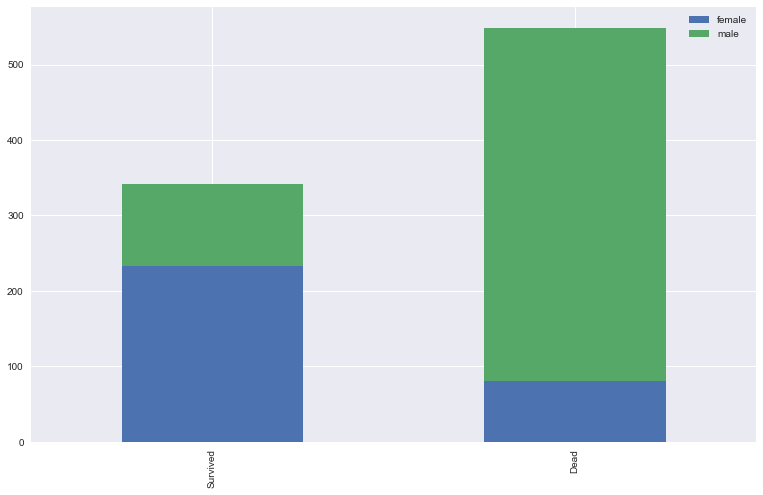

In [156]:
survived = trainDataFrame[trainDataFrame['Survived']==1]['Sex'].value_counts()
dead = trainDataFrame[trainDataFrame['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))

Graph shows that more women survived then men and far more men died then women

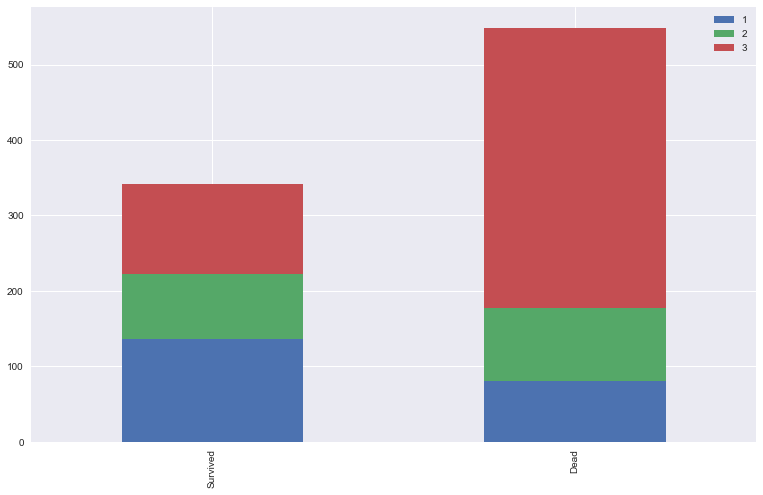

In [157]:
survived = trainDataFrame[trainDataFrame['Survived']==1]['Pclass'].value_counts()
dead = trainDataFrame[trainDataFrame['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))

Graph shows that people in first class were most likely to survive then those in third and second class

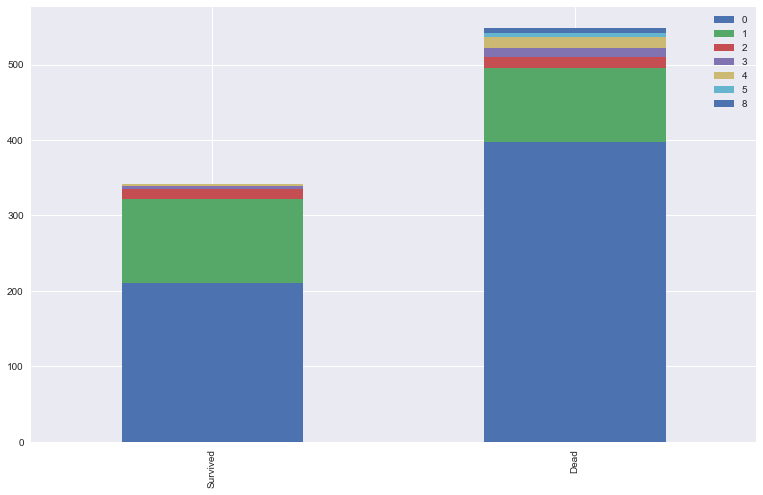

In [158]:
survived = trainDataFrame[trainDataFrame['Survived']==1]['SibSp'].value_counts()
dead = trainDataFrame[trainDataFrame['Survived']==0]['SibSp'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))

The graph show that passenger with multiple sibling had a higher chance of surviving 

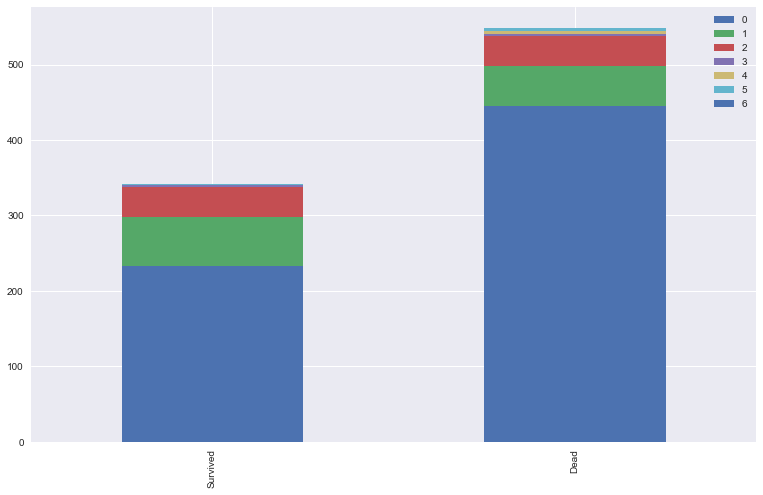

In [159]:
survived = trainDataFrame[trainDataFrame['Survived']==1]['Parch'].value_counts()
dead = trainDataFrame[trainDataFrame['Survived']==0]['Parch'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))

The graph comfirms that passengers with childern were more likely to survive

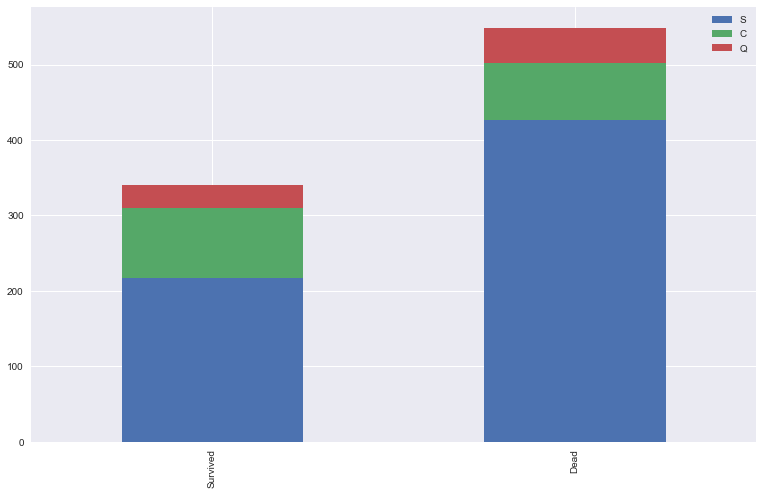

In [160]:
survived = trainDataFrame[trainDataFrame['Survived']==1]['Embarked'].value_counts()
dead = trainDataFrame[trainDataFrame['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))

The data shows that those who boarded in Cherbourg were most likely to survive then those who board in Queenstown and Southampton

# Creating elements For Machine Learning Algorithm 

In order to make a better prediction, we need to take a deeper look in the data and extract more information about 
the passengers. Such as name titles, age and Fare for ticket. In addition we also need to process each element in a numerical value such as titles and embarked information. Futhermore we also have to remove any NaN value within the dataframe.

In order to get a better understanding of whcih people survived the Titanic we will anaylze the title of each passenger 
in the given data.


In [161]:
merge=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
#creating dataframe for train and test data


In [162]:
merge

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Titles

In [163]:
titles = merge['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [164]:
titles.value_counts()
#all titles in merge dataframe

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Mme               1
Ms                1
Capt              1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Name: Name, dtype: int64

In [165]:
titles = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [166]:
titles.value_counts()
#all titles in test data frame.

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64

In [167]:
merge['Title'] = merge['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

Title= {
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Rev":        "Crew",
                    "Dr":         "Crew",
                    "Capt":       "Crew",
                    "Col":        "Crew",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Lady" :      "Royalty",
                    "Major":      "Crew",
                    "Jonkheer":   "Crew",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Capt":       "Crew",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                   
                        }
merge['Title'] = merge.Title.map(Title)
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test.Title.map(Title)
#create element Title in both data frame that well contain the title of each passenger. 

In [168]:
merge

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


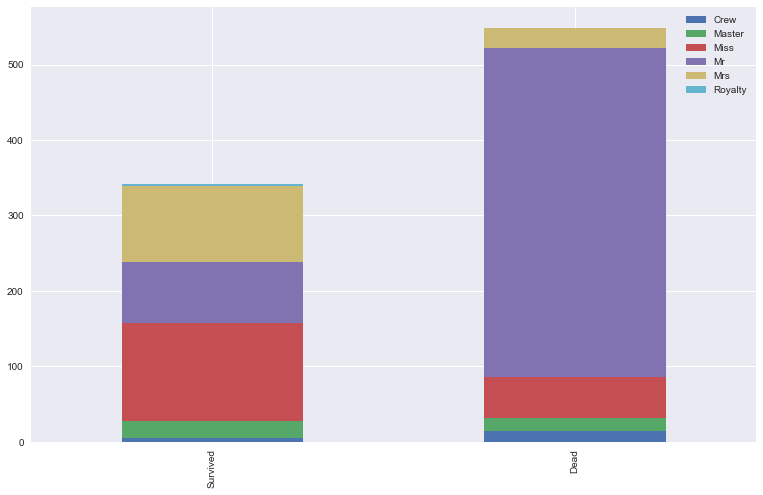

In [169]:
survived = merge[merge['Survived']==1]['Title'].value_counts()
dead = merge[merge['Survived']==0]['Title'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))

# age
next we try to fill in the missing age values using median of the known passenger ages

In [170]:
merge["Age"].fillna(merge.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)


In [171]:
merge

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [172]:
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr


In [173]:

    
num= pd.get_dummies(merge['Title'],prefix='Title')
merge = pd.concat([merge,num],axis=1)
num1= pd.get_dummies(test['Title'],prefix='Title')
test = pd.concat([test,num1],axis=1)
#titles in both dataframe are turned into numerical value
merge.drop('Title', axis=1, inplace=True)
test.drop('Title', axis=1, inplace=True)
#the title element is dropped
mappingEmbarked = {'S': 0, 'C': 1, 'Q': 2}
merge['Embarked'] = merge.Embarked.map(mappingEmbarked)
mapSex = {"male": 0, "female": 1}
merge['Sex'] = merge.Sex.map(mapSex)
mapSex = {"male": 0, "female": 1}
test['Sex'] = test.Sex.map(mapSex)
mappingEmbarked = {'S': 0, 'C': 1, 'Q': 2}
test['Embarked'] = test.Embarked.map(mappingEmbarked)
#both embark and sex elements are turn in to integet values in both data frames

test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
merge["Embarked"].fillna(merge.groupby("Pclass")["Embarked"].transform("median"), inplace=True)
#all remaining NaN values are romved with the each corresponding elements median

In [174]:

features_drop = ['Ticket', 'SibSp', 'Parch']
merge = merge.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
merge =merge.drop(['PassengerId'], axis=1)
target = merge['Survived']
merge= merge.drop('Survived', axis=1)
merge.drop('Name', axis=1, inplace=True)
merge.drop('Cabin', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
#the ticket, sisbip, parch, name, and cabin elements will not be need in the prediction.


In [175]:
merge

,Pclass,Sex,Age,Fare,Embarked,Title_Crew,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty
0,3,0,22.0,7.2500,0.0,0,0,0,1,0,0
1,1,1,38.0,71.2833,1.0,0,0,0,0,1,0
2,3,1,26.0,7.9250,0.0,0,0,1,0,0,0
3,1,1,35.0,53.1000,0.0,0,0,0,0,1,0
4,3,0,35.0,8.0500,0.0,0,0,0,1,0,0
5,3,0,30.0,8.4583,2.0,0,0,0,1,0,0
6,1,0,54.0,51.8625,0.0,0,0,0,1,0,0
7,3,0,2.0,21.0750,0.0,0,1,0,0,0,0
8,3,1,27.0,11.1333,0.0,0,0,0,0,1,0
9,2,1,14.0,30.0708,1.0,0,0,0,0,1,0


In [176]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title_Crew,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty
0,892,3,0,34.5,7.8292,2,0,0,0,1,0,0
1,893,3,1,47.0,7.0000,0,0,0,0,0,1,0
2,894,2,0,62.0,9.6875,2,0,0,0,1,0,0
3,895,3,0,27.0,8.6625,0,0,0,0,1,0,0
4,896,3,1,22.0,12.2875,0,0,0,0,0,1,0
5,897,3,0,14.0,9.2250,0,0,0,0,1,0,0
6,898,3,1,30.0,7.6292,2,0,0,1,0,0,0
7,899,2,0,26.0,29.0000,0,0,0,0,1,0,0
8,900,3,1,18.0,7.2292,1,0,0,0,0,1,0
9,901,3,0,21.0,24.1500,0,0,0,0,1,0,0


In [177]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
Fare             0
Embarked         0
Title_Crew       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Royalty    0
dtype: int64

In [178]:
merge.isnull().sum()

Pclass           0
Sex              0
Age              0
Fare             0
Embarked         0
Title_Crew       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Royalty    0
dtype: int64

In [179]:
target.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Use classifier to make prediction
test ran using random forest classifier and cvs file is created that contains generated results.

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [181]:
c = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(c, merge, target, cv=k_fold, n_jobs=1, scoring=scoring)


In [182]:


c = RandomForestClassifier(n_estimators=13)
c.fit(merge, target)
merge= test.drop("PassengerId", axis=1).copy()

p = c.predict(merge)



In [183]:
sub = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": p
    })

sub.to_csv('submission.csv', index=False)